In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
len(data.index)

14640

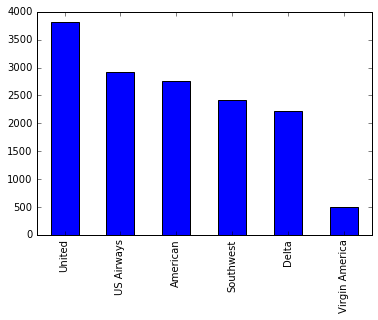

In [10]:
data.airline.value_counts().plot(kind='bar')

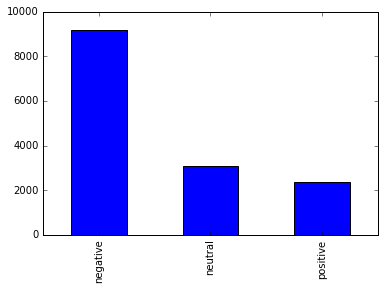

In [11]:
data.airline_sentiment.value_counts().plot(kind='bar')

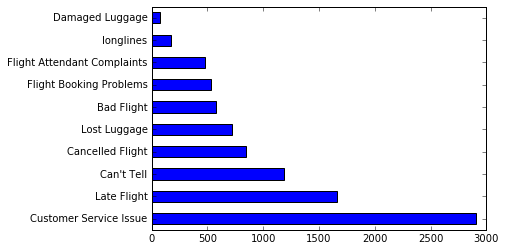

In [15]:
data.negativereason.value_counts().plot(kind='barh')

In [42]:
data.tweet_location.value_counts()

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
Chicago                           104
New York City                      96
Los Angeles, CA                    96
NYC                                95
San Francisco, CA                  91
San Francisco                      86
Chicago, IL                        81
Brooklyn, NY                       66
Austin, TX                         64
Los Angeles                        64
Washington, D.C.                   63
Boston                             62
Dallas, TX                         54
Washington DC                      53
Nashville, TN                      45
NY                                 42
Texas                              42
Philadelphia, PA                   38
San Diego                          38
Denver, CO                         37
Houston, TX                        35
Global      

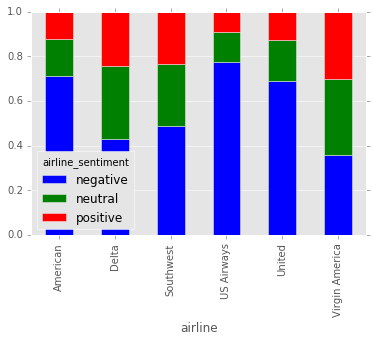

In [18]:
temp = data.groupby(['airline','airline_sentiment']).size()
temp = temp.unstack()
temp = temp.apply(lambda a:a/a.sum(),axis=1)
temp.plot(kind='bar',stacked=True)

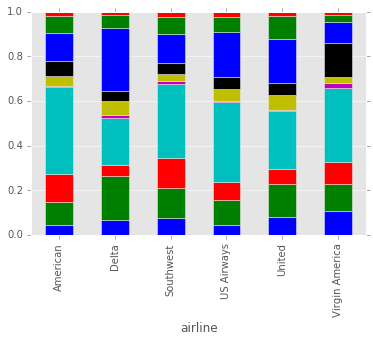

In [23]:
temp = data.groupby(['airline','negativereason']).size()
temp = temp.unstack()
temp = temp.apply(lambda x:x / x.sum(),axis=1)
temp.plot(kind='bar',stacked=True,legend=False)

In [1]:
temp = data[['airline_sentiment','user_timezone']]
temp.user_timezone.value_counts()

NameError: name 'data' is not defined

In [37]:
data.tweet_location.value_counts()

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
Chicago                           104
New York City                      96
Los Angeles, CA                    96
NYC                                95
San Francisco, CA                  91
San Francisco                      86
Chicago, IL                        81
Brooklyn, NY                       66
Austin, TX                         64
Los Angeles                        64
Washington, D.C.                   63
Boston                             62
Dallas, TX                         54
Washington DC                      53
Nashville, TN                      45
NY                                 42
Texas                              42
Philadelphia, PA                   38
San Diego                          38
Denver, CO                         37
Houston, TX                        35
Global      

In [58]:
len(data.name.value_counts())

7701

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [52]:
def getWordCount(text):
    word_count = {}
    for word in text:
        word = word.lower()
        if len(word)>2 and word not in stop and '@' not in word:
            if word in word_count:
                word_count[word] = word_count[word] + 1
            else:
                word_count[word] = 1
    return word_count

In [53]:
temp2 = data[data.airline_sentiment=='negative']
negtext = temp2.text
negtext = negtext.to_string().split()


In [54]:
negcount = pd.Series(getWordCount(negtext))
negcount.sort_values(ascending=False).head(10)

...          1614
flight        950
cancelled     309
get           284
hold          254
i'm           252
customer      221
t...          192
still         181
delayed       180
dtype: int64

In [55]:
temp3 = data[data.airline_sentiment=='positive']
postext = temp3.text
postext = postext.to_string().split()


In [57]:
poscount = pd.Series(getWordCount(postext))
poscount.sort_values(ascending=False).head(10)

thank      352
...        343
thanks     304
flight     130
great      110
you!        92
thanks!     83
love        72
got         65
you.        56
dtype: int64

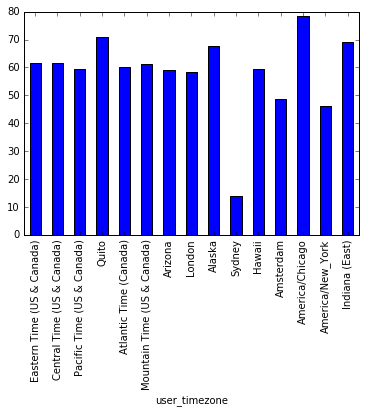

In [15]:
temp = data.groupby(['user_timezone','airline_sentiment']).size()
temp = temp.unstack().fillna(0)
temp['total'] = temp.sum(axis=1)
temp['negratio'] = temp.negative*100.0/temp.total
temp.sort_values('total',ascending=False).head(15).negratio.plot(kind='bar')

In [24]:
tweet_time = data.tweet_created.str.split(expand=True)
tweet_hour = tweet_time.iloc[:,1].str.split(':',expand=True).iloc[:,0]
data['tweet_hour'] = tweet_hour

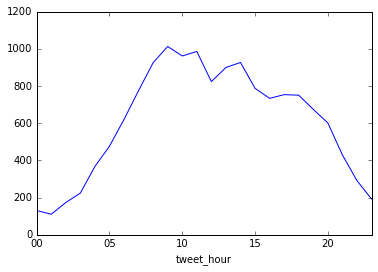

In [43]:
temp2 = data.groupby(['tweet_hour']).size().plot()

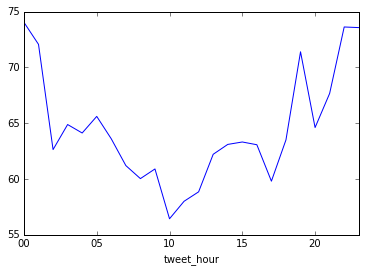

In [49]:
temp3 = data.groupby(['tweet_hour','airline_sentiment']).size()
temp3 = temp3.unstack().fillna(0)
temp3['total'] = temp3.sum(axis=1)
temp3['negative_ratio'] = temp3.negative*100.0/temp3.total
temp3.negative_ratio.plot()

In [25]:

temp4 = data.groupby(['tweet_hour','negativereason']).size()
temp4 = temp4.unstack().fillna(0)
temp4['total'] = temp4.sum(axis=1)